# Simple Linear regression with Train_Test_Split

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/Advertising.csv' , usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/Users/tae/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


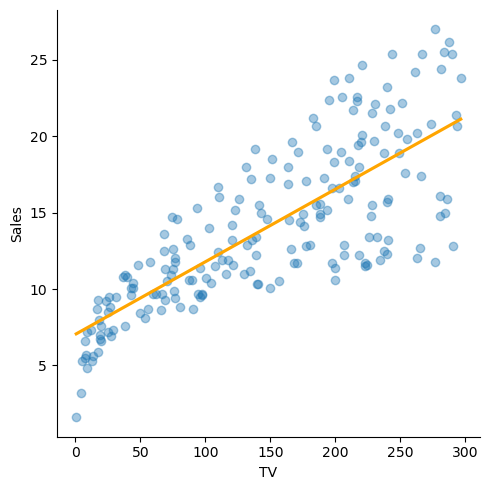

In [19]:
sns.lmplot(x='TV' , y='Sales' , data=df , ci=None , 
          scatter_kws={'alpha':0.4},
          line_kws={'color':'orange'})

/Users/tae/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


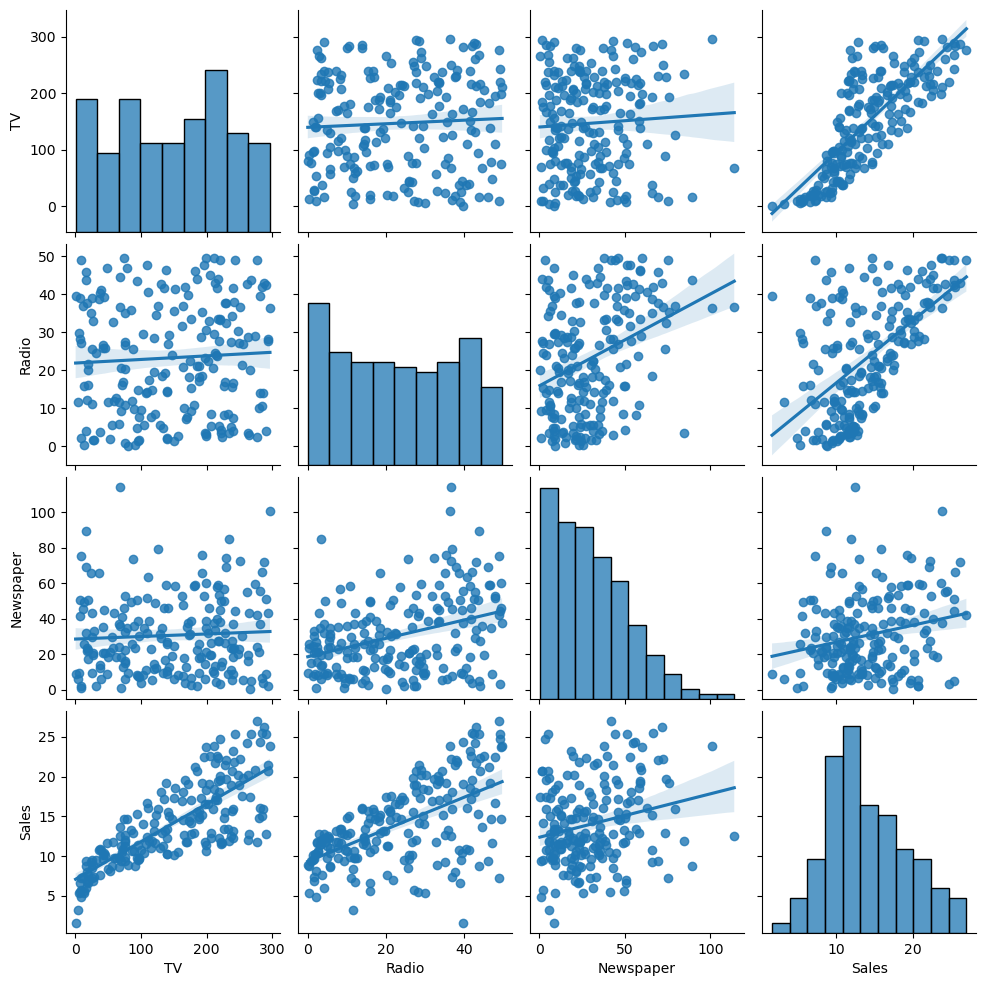

In [20]:
sns.pairplot(df, kind='reg')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [35]:
# Train Test Split
X = df[['TV','Radio','Newspaper']]
y = df['Sales']
X_train , X_test , y_train , y_test  = train_test_split(X,y,
                                                         test_size=0.3,
                                                         random_state=7)



In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
print('R-squre:',model.score(X_test,y_test))
print('intercept:',model.intercept_)
print('coef:',model.coef_)

R-squre: 0.8894586465158203
intercept: 2.5971913990213036
coef: [ 4.71259657e-02  1.90987993e-01 -1.93812266e-05]


In [48]:
y_hat = model.predict(X_train)
train = pd.concat([X_train , y_train] , axis=1)

train.head()

,TV,Radio,Newspaper,Sales
88,88.3,25.5,73.4,12.9
58,210.8,49.6,37.7,23.8
113,209.6,20.6,10.7,15.9
149,44.7,25.8,20.6,10.1
36,266.9,43.8,5.0,25.4


In [63]:
predict = pd.concat([train.reset_index() , pd.Series(y_hat , name='prdict_train')], axis='columns')
predict

,index,TV,Radio,Newspaper,Sales,prdict_train
0,88,88.3,25.5,73.4,12.9,11.627185
1,58,210.8,49.6,37.7,23.8,22.003619
2,113,209.6,20.6,10.7,15.9,16.408939
3,149,44.7,25.8,20.6,10.1,9.630813
4,36,266.9,43.8,5.0,25.4,23.540289
...,...,...,...,...,...,...
135,151,121.0,8.4,48.7,11.6,9.902789
136,67,139.3,14.5,10.2,13.4,11.930967
137,25,262.9,3.5,19.5,12.0,15.654688
138,196,94.2,4.9,8.1,9.7,7.972142


In [53]:
# Test
y_hat_test = model.predict(X_test)
y_hat_test

array([11.44476229, 14.37367315,  6.25500193, 17.29877053,  5.1037914 ,
       12.17276377,  7.62662219, 10.33214076,  8.77992131, 13.09010986,
        3.29044059, 12.57762584,  9.56979963,  7.62505392, 18.72987897,
        5.0057581 ,  7.93923309, 16.93193167, 18.25136197,  8.71447974,
       16.07575914, 19.69512239,  8.61453225, 17.3519232 ,  9.57182285,
       18.01945212, 23.4962362 , 12.71455161, 19.77063344, 12.10705488,
       12.68239566,  5.87563284, 14.18270814, 20.87041368, 19.5800746 ,
       15.21483369, 10.39322617, 24.36171125, 11.29656239, 11.88775796,
        7.69691954, 22.33739127,  5.49999179, 13.61147654, 17.10119141,
       16.39861924, 15.14556732,  8.21775584, 11.24015588, 15.47711028,
        7.46373581,  8.64334225,  6.35011873,  8.56203042, 15.64802928,
       19.49746243,  9.7732074 , 18.48500068, 11.70700465, 15.32110391])

In [64]:
test = pd.concat([X_test , y_test] , axis=1)
test.head()

,TV,Radio,Newspaper,Sales
86,76.3,27.5,16.0,12.0
120,141.3,26.8,46.2,15.5
22,13.2,15.9,49.6,5.6
11,214.7,24.0,4.0,17.4
195,38.2,3.7,13.8,7.6


In [65]:
combined_test = pd.concat([test.reset_index(), pd.Series(y_hat_test , name='predict_test')] , axis=1)
combined_test.head()

,index,TV,Radio,Newspaper,Sales,predict_test
0,86,76.3,27.5,16.0,12.0,11.444762
1,120,141.3,26.8,46.2,15.5,14.373673
2,22,13.2,15.9,49.6,5.6,6.255002
3,11,214.7,24.0,4.0,17.4,17.298771
4,195,38.2,3.7,13.8,7.6,5.103791


In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [70]:
model_a = smf.ols(formula='Sales ~ TV + Radio + Newspaper' , data=test).fit()

In [71]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     162.6
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.31e-27
Time:                        12:55:00   Log-Likelihood:                -112.96
No. Observations:                  60   AIC:                             233.9
Df Residuals:                      56   BIC:                             242.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5389      0.510      6.933      0.0